# RBP Maps: Using maps to plot CDS start sites without scaling.
- This notebook shows how we can plot skipped exon events about a CDS region using the 'rmats' file format. 
- 'rmats' format is the JunctionCountOnly.txt file output from rMATS
    - the rMATS file should have these columns: **ID, GeneID, geneSymbol, chr, strand, exonStart_0base, exonEnd, upstreamES, upstreamEE, downstreamES, downstreamEE, ID.1, IJC_SAMPLE_1, SJC_SAMPLE_1, IJC_SAMPLE_2, SJC_SAMPLE_2, IncFormLen, SkipFormLen, PValue, FDR, IncLevel1, IncLevel2, IncLevelDifference**

In [1]:
%matplotlib inline
""" the following makes sure that saving to svg also renders fonts properly. """
import matplotlib
from matplotlib import rc
rc('text', usetex=False)
matplotlib.rcParams['svg.fonttype'] = 'none'
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

""" import the rest of the stuff """
import os
import sys
from maps.density import Map
from maps.density import ReadDensity
from maps.density import normalization_functions

/home/bay001/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# Define params
```
- twobed : file containing 12-column, tab-separated annotation defining an exon and a feature within that exon (ie. CDS start site)
- ip_bam : file containing the IP bam file (mostly used for read-counting)
- inp_bam : file containing the input bam file (mostly used for read-counting)
- pos/neg_ip_bw : bigwig file corresponding to the positively/negatively stranded read densities for depth
- pos/neg_in_bw : bigwig file corresponding to the positively/negatively stranded read densities for depth
- annotation_type : tells the program what kind of annotation to expect
- NOTE : the annotation is a dictionary: {twobed:annotation_type}
```

In [3]:
wd = '/home/bay001/projects/codebase/temp/se/'

In [10]:
included_upon_kd = os.path.join(wd,'RBFOX2-HepG2-SE-positive.txt')
excluded_upon_kd = os.path.join(wd,'RBFOX2-HepG2-SE-negative.txt')
ip_bam = os.path.join(wd,'204_01_RBFOX2.merged.r2.bam')
inp_bam = os.path.join(wd,'RBFOX2-204-INPUT_S2_R1.unassigned.adapterTrim.round2.rmRep.rmDup.sorted.r2.bam')

pos_ip_bw = os.path.join(wd,'204_01_RBFOX2.merged.r2.norm.neg.bw') # may be flipped due to the *pos *neg thing
neg_ip_bw = os.path.join(wd,'204_01_RBFOX2.merged.r2.norm.pos.bw')
pos_in_bw = os.path.join(wd,'RBFOX2-204-INPUT_S2_R1.unassigned.adapterTrim.round2.rmRep.rmDup.sorted.r2.norm.neg.bw')
neg_in_bw = os.path.join(wd,'RBFOX2-204-INPUT_S2_R1.unassigned.adapterTrim.round2.rmRep.rmDup.sorted.r2.norm.pos.bw')

annotation_type = 'rmats'

output_file = '/home/bay001/projects/codebase/temp/se/rbfox2.png'

# Define Objects
- **```norm_func```** : a normalization function described in the normalization_functions.py file (default is subtraction)
- **```annotations```** : dict of {annotation_file : annotation_type, annotation_file2 : annotation_type, etc.}
- **```ip_rd```** : ReadDensity(pos_bw, neg_bw, bam) Object describing the ip CLIP read densities
- **```in_rd```** : ReadDensity(pos_bw, neg_bw, bam) Object describing the input CLIP read densities
- **```rbpmap```** : Map Object that contains the following attributes:
    - **```ip_rd```** : ip_readDensity() previously described
    - **```in_rd```** : input ReadDensity() previously described
    - **```output_filename```** : output file name
    - **```norm_function```** : norm_func previously described
    - **```annotation```** : annotations dictionary previously described
    - **```intron_offset```** : number of nucleotides to plot from the splice site into the intron.
    - **```exon_offset```** : number of nucleotides to plot from the splice site into the exon.

In [11]:
norm_func = normalization_functions.normalize_and_per_region_subtract
annotations = {included_upon_kd:annotation_type, excluded_upon_kd:annotation_type}

ip_rd = ReadDensity.ReadDensity(pos=pos_ip_bw,neg=neg_ip_bw,bam=ip_bam)
in_rd = ReadDensity.ReadDensity(pos=pos_in_bw,neg=neg_in_bw,bam=inp_bam)

rbpmap = Map.SkippedExon(
    ip=ip_rd, 
    inp=in_rd, 
    output_filename=output_file,
    norm_function=norm_func,
    annotation=annotations,
    intron_offset=300,
    exon_offset=50,
)

### rbpmap functions

- **```rbpmap.create_matrices()```** : creates the density matrices for each annotation, for each ip and input
- **```rbpmap.normalize_matrix()```** : normalize the ip/input matrices for each annotation
- **```rbpmap.set_means_and_sems()```** : calculates the mean density values and associated standard error
- **```rbpmap.write_intermediate_raw_matrices_to_csv()```** : writes all of the ip/input normalized/unnormalized data files to - the base directory of the specified output file. 
- **```rbpmap.plot()```** : plots the rbp map

. . . . DONE


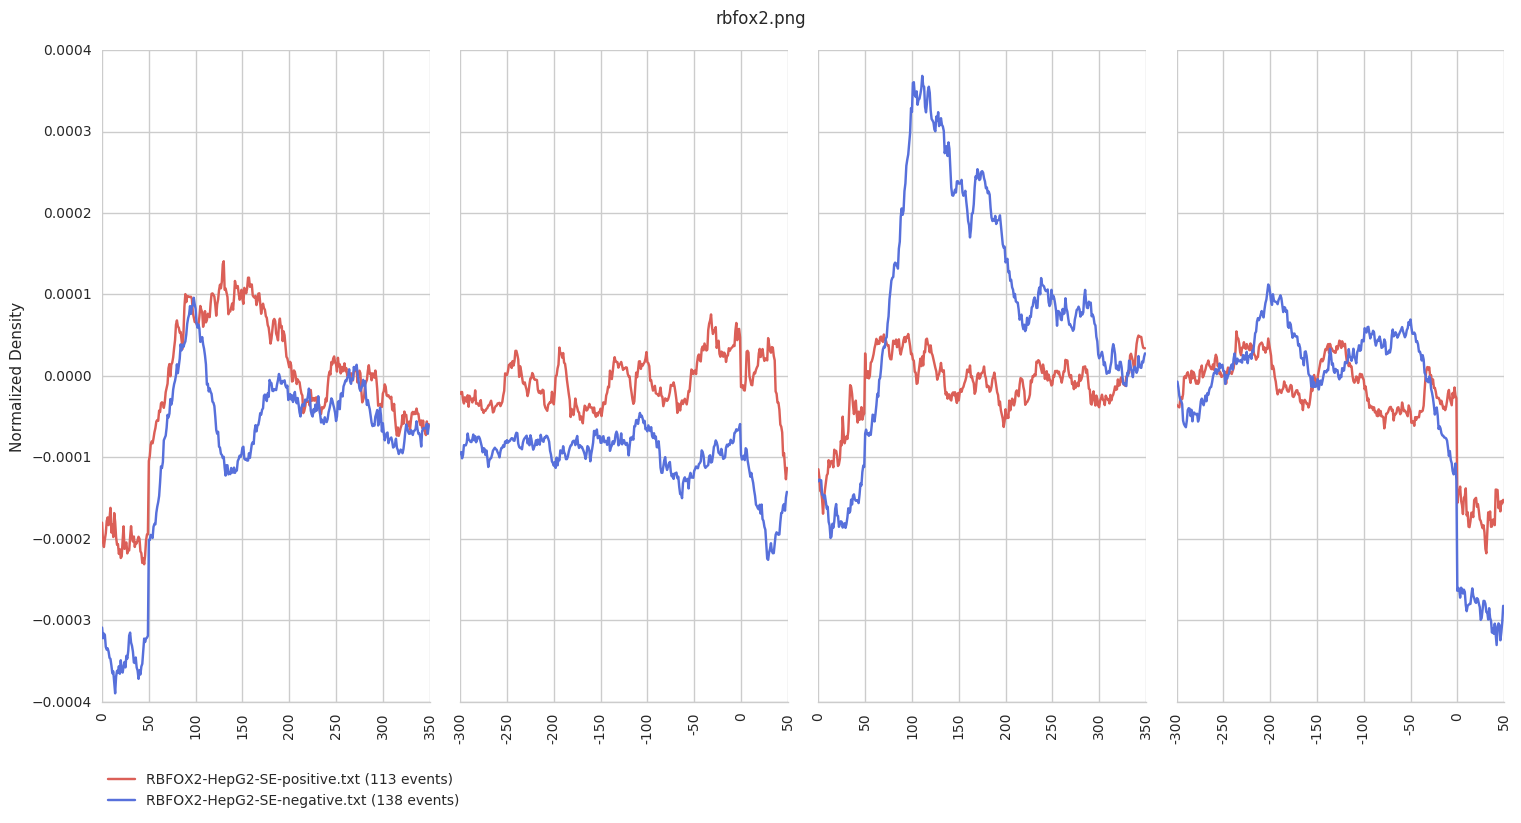

In [12]:
rbpmap.create_matrices()
print('.'),
rbpmap.normalize_matrix()
print('.'),
rbpmap.set_means_and_sems()
print('.'),
rbpmap.write_intermediate_raw_matrices_to_csv()
print('.'),
rbpmap.plot()
print('DONE'),